# Model based on tabular data only

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.tabular import *
from fastai.metrics import accuracy

## Model

In [ ]:
df = pd.read_feather('tabular-df')

In [ ]:
df = df.drop('title', axis=1)
cont_cols = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6',
             'col7', 'col8', 'col9', 'col10', 'col11', 'col12'] # real columns names were replaced
cat_cols = list(set(df.columns) - set(cont_cols) - {'condition'})
valid_sz = 10000
valid_idx = range(len(df)-valid_sz, len(df))
procs = [FillMissing, Categorify, Normalize]

In [6]:
data = (TabularList.from_df(df, cat_cols, cont_cols, procs=procs)
        .split_by_idx(valid_idx)
        .label_from_df(cols='condition')
        .databunch())

In [12]:
learn = get_tabular_learner(data, layers=[64], ps=[0.5], emb_drop=0.05, metrics=accuracy)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


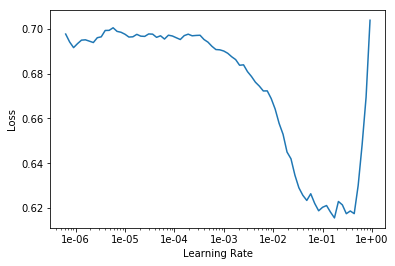

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, 1e-2, wd=1e-6)

Total time: 00:38
epoch  train_loss  valid_loss  accuracy
1      0.253736    0.253902    0.896600  (00:08)
2      0.193293    0.231615    0.909400  (00:07)
3      0.144753    0.227158    0.913200  (00:07)
4      0.092080    0.244881    0.914300  (00:07)
5      0.067578    0.248254    0.915600  (00:07)



In [11]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(33283, 50)
    (2): Embedding(5, 3)
    (3): Embedding(5, 3)
    (4): Embedding(8, 5)
    (5): Embedding(3, 2)
    (6): Embedding(3481, 50)
    (7): Embedding(286, 50)
    (8): Embedding(26, 14)
    (9): Embedding(10492, 50)
    (10): Embedding(304, 50)
    (11): Embedding(30, 16)
    (12): Embedding(1461, 50)
    (13): Embedding(570, 50)
    (14): Embedding(300, 50)
    (15): Embedding(3, 2)
    (16): Embedding(3, 2)
  )
  (emb_drop): Dropout(p=0.05)
  (bn_cont): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=462, out_features=64, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=64, out_features=2, bias=True)
  )
)